# Data Science Immersive - General Assembly 
## Capstone Project
Harsha Goonewardana <br>
Today

 #### This notebook will a tuned neural network to find the best prediction

As the airbnb_yield variable shows extreme noise , the project will focus on the price variable instead

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [12]:
df = pd.read_pickle('./data/airbnbAmenities_coded.pkl')

In [13]:
df.head(4)

,number_of_reviews,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,security_deposit,ppl_bath,guest_prop,bnb_yield,DateDiffHostSince,dist_transit,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Bathtub with bath chair,Beach essentials,Beachfront,Bed linens,Breakfast,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Dryer,EV charger,Electric profiling bed,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Family/kid friendly,Fire extinguisher,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to front door,Free parking on premises,Free street parking,Game console,Garden or backyard,Ground floor access,Gym,Hair dryer,Handheld shower head,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hot water kettle,Indoor fireplace,Internet,Iron,Keypad,Kitchen,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Mobile hoist,Other,Other pet(s),Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pocket wifi,Pool,Pool with pool hoist,Private bathroom,Private entrance,Private living room,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski in/Ski out,Smart lock,Smoke detector,Smoking allowed,Stair gates,Step-free access,Stove,Suitable for events,TV,Table corner guards,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower,Wide doorway,Wide entryway,Wide hallway clearance,Wifi,Window guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,neighbourhood_cleansed_Allerton,neighbourhood_cleansed_Arrochar,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bath Beach,neighbourhood_cleansed_Battery Park City,neighbourhood_cleansed_Bay Ridge,neighbourhood_cleansed_Bay Terrace,neighbourhood_cleansed_Baychester,neighbourhood_cleansed_Bayside,neighbourhood_cleansed_Bayswater,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Belle Harbor,neighbourhood_cleansed_Bellerose,neighbourhood_cleansed_Belmont,neighbourhood_cleansed_Bensonhurst,neighbourhood_cleansed_Bergen Beach,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Borough Park,neighbourhood_cleansed_Briarwood,neighbourhood_cleansed_Brighton Beach,neighbourhood_cleansed_Bronxdale,neighbourhood_cleansed_Brooklyn Heights,neighbourhood_cleansed_Brownsville,neighbourhood_cleansed_Bull's Head,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Cambria Heights,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Castle Hill,neighbourhood_cleansed_Castleton Corners,neighbourhood_cleansed_Chelsea,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_City Island,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Claremont Village,neighbourhood_cleansed_Clason Point,neighbourhood_cleansed_Clifton,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Co-op Cit

In [14]:
df.shape

(37260, 373)

In [26]:
#prepare for train,split, test
X = df.drop(['bnb_yield','price'],axis=1)
y=df['bnb_yield']


In [27]:
#TTS
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.25, random_state=42,)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Shapes
X_train: (27945, 371)
X_test: (9315, 371)
y_train: (27945,)
y_test: (9315,)


In [28]:
ss = StandardScaler()

#scale and transform the predictive dataset in both test and train forms
X_train_s= ss.fit_transform(X_train) # saved the mean and std from X_train
X_test_s=ss.transform(X_test)

#### a seven-layer neural network with L2 regularization was used for regression 

In [33]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=513)
from keras import regularizers
from keras.layers import Dropout
# y_train.shape

from keras.layers import Dense 

from keras import Sequential

input_dim= X_train.shape[1]
output_dim= 1

# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1, mode='auto')


model= Sequential()
model.add(Dense(600, input_dim=input_dim, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5)) # Ben Shaver suggestion
model.add(Dense(256, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(96, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(28, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(output_dim))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), 
                    epochs=50, verbose=2)

Train on 27945 samples, validate on 9315 samples
Epoch 1/50
 - 9s - loss: 726062263.7942 - mean_squared_error: 726062259.7771 - val_loss: 621632879.2726 - val_mean_squared_error: 621632874.6503
Epoch 2/50
 - 8s - loss: 580689392.5330 - mean_squared_error: 580689384.9605 - val_loss: 587038328.6604 - val_mean_squared_error: 587038320.6278
Epoch 3/50
 - 8s - loss: 556049028.2266 - mean_squared_error: 556049019.5329 - val_loss: 588311861.7198 - val_mean_squared_error: 588311852.2804
Epoch 4/50
 - 8s - loss: 531951853.4607 - mean_squared_error: 531951841.1669 - val_loss: 544673742.3802 - val_mean_squared_error: 544673719.0072
Epoch 5/50
 - 9s - loss: 492021536.6802 - mean_squared_error: 492021504.4729 - val_loss: 520136259.0248 - val_mean_squared_error: 520136217.2934
Epoch 6/50
 - 10s - loss: 474224522.7348 - mean_squared_error: 474224481.0924 - val_loss: 491205151.0733 - val_mean_squared_error: 491205107.5929
Epoch 7/50
 - 9s - loss: 450020878.9728 - mean_squared_error: 450020835.0672 - v

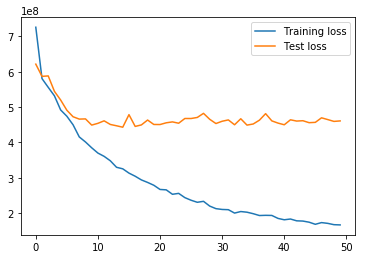

In [34]:
train_loss=history.history['loss']
test_loss=history.history['val_loss']
plt.plot(train_loss,label='Training loss')
plt.plot(test_loss,label='Test loss')
plt.legend();

the difference between the training and test dropped after drop out

In [31]:
np.sqrt(513316963.2296) # no drop out 

22656.499359556852

In [35]:
np.sqrt(459584351.6908) # with drop out

21437.918548469206

In [ ]:
df.price.mean()